In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
# The ImageDataGenerator is helpful for Data Augumentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# We are trying to fix the Input size of each Image to be 224x224
IMAGE_SIZE = [224, 224]

#Importing of Training Dataset and Test Dataset
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Importing the ResNet50 library and add preprocessing layer to the top front of ResNet50
# The ImageNet weights are going to be used for training, the final output will not include 1000 classes thats why include_top=F
# We are taking RGB Images and hence added 3 to Input Image dimension
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# To understand the number of layers used in RestNet50
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# We don't want to train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# This is useful for extracting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [7]:
len(folders)

3

In [8]:
# Flatten of output
x = Flatten()(resnet.output)

In [9]:
# Using of Softmax as to classify more than 2 classes
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# Structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# Compiling the trained model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # Normalizing the images between 0 to 1
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Data Augmentation is not performed for the test dataset so only Re-scaling is done
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Applying Data Augmentation to the training dataset
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
# Applying Data Augmentation to the testing dataset
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 57 images belonging to 3 classes.


In [15]:
# Fitting of the model on the Augmented data and saved in variable 'r'

from PIL import Image
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 2 steps
Epoch 1/5
2/2 [==============================] - 43s 21s/step - loss: 10.8017 - accuracy: 0.4062 - val_loss: 5.2235 - val_accuracy: 0.3333
Epoch 2/5
2/2 [==============================] - 33s 17s/step - loss: 3.6379 - accuracy: 0.7812 - val_loss: 7.0895 - val_accuracy: 0.3333
Epoch 3/5
2/2 [==============================] - 36s 18s/step - loss: 2.2447 - accuracy: 0.8125 - val_loss: 13.3661 - val_accuracy: 0.3333
Epoch 4/5
2/2 [==============================] - 38s 19s/step - loss: 0.3114 - accuracy: 0.9688 - val_loss: 17.4405 - val_accuracy: 0.3333
Epoch 5/5
2/2 [==============================] - 38s 19s/step - loss: 1.9797 - accuracy: 0.8750 - val_loss: 19.2712 - val_accuracy: 0.3333


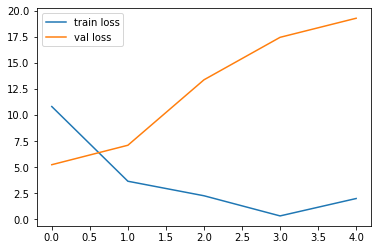

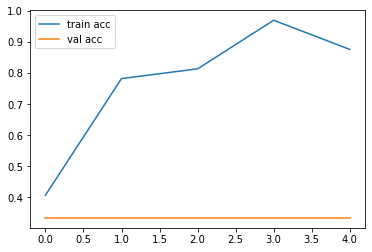

<Figure size 432x288 with 0 Axes>

In [16]:
# Plotting the loss value obtained from history
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
# Save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred = np.argmax(y_pred, axis=1)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Loading Model
model=load_model('model_resnet50.h5')

In [21]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [22]:
x.shape
x=x/255

In [23]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [24]:
model.predict(img_data)

array([[5.9538916e-09, 3.3072320e-07, 9.9999964e-01]], dtype=float32)

In [25]:
a=np.argmax(model.predict(img_data), axis=1)

In [27]:
a

array([2], dtype=int64)